# Analysing Netflix Dataset 
## Has the average duration of the movies increased over the years ?
### Let's analyse the Netflix dataset to see if the average duration of movies has increased or decreased over the years. 

In [1]:
import pandas as pd
import numpy as np
import csv
from pathlib import Path 
import re
import string
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv(r'/Users/lolitalolita/Downloads/netflix_titles.csv')

In [3]:
# Drop missing values
df.dropna(inplace = True)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...


In [4]:
print('We have:',len(df[df['type']=='Movie']),'movies')
print('We have:',len(df[df['type']=='TV Show']),'TV shows')

We have: 5185 movies
We have: 147 TV shows


In [5]:
print(df['rating'].unique())

['TV-MA' 'TV-14' 'PG-13' 'PG' 'R' 'TV-PG' 'G' 'TV-Y7' 'TV-G' 'TV-Y'
 'NC-17' 'NR' 'TV-Y7-FV' 'UR']


## Check the proportion of the Movies and TV Shows in the dataset
### We can see that dataset is not balanced. Mostly, we can see that we have movies.

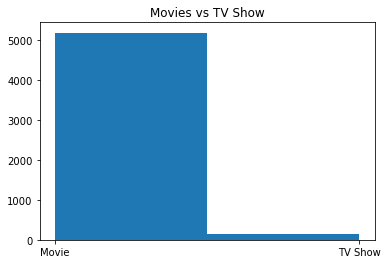

In [6]:
fig = plt.figure()
plt.hist(df['type'],2)
plt.title('Movies vs TV Show')
plt.show()

## Let's filter the dataset on movies, and split the duration column to get numbers. 

In [7]:
df=df[df['duration'].notna()]
df=df[df['type']=='Movie']
new=df['duration'].str.split(" ", n = 1, expand = True)
df['duration new']=new[0]
df["duration new"] = pd.to_numeric(df["duration new"])

In [8]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration new
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",125
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,104
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,127
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,166
27,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,"September 20, 2021",2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...,103


In [9]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'duration new'],
      dtype='object')

In [10]:
len(df)

5185

## Group by year, aggregate by duration. 


In [12]:
years_by_avg_duration=df.groupby('release_year')['duration new'].aggregate(['max','min','mean','count'])

In [13]:
years_by_avg_duration=years_by_avg_duration.reset_index()

In [14]:
years_by_avg_duration

,release_year,max,min,mean,count
0,1942,18,18,18.000000,1
1,1944,76,76,76.000000,1
2,1945,63,63,63.000000,1
3,1946,58,58,58.000000,1
4,1947,42,42,42.000000,1
...,...,...,...,...,...
67,2017,181,14,97.153125,640
68,2018,182,12,99.063291,632
69,2019,209,13,97.971717,495
70,2020,190,8,96.141809,409


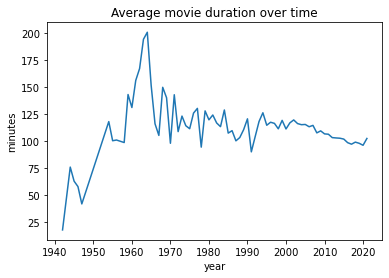

In [15]:
fig=plt.figure()
plt.plot(years_by_avg_duration['release_year'],years_by_avg_duration['mean'])
plt.title('Average movie duration over time')
plt.xlabel('year')
plt.ylabel('minutes')
plt.show()

## We can see that the average duration has decreased over years. However, we do not see the number of filmes that were released each years. 
### After looking at the number of movies released each year, we can observe that there was a singnificant drop of movies released in year 2021. We can assume that it could be related with Covid pandemic. Since we experienced lockdowns everywhre in the world, movie production industry was stagnant. 

### Going back to the average durating of the movies, we can also see that the the number of films in 1960's (where we see the longest average duration) is small comparing to the number of films released for the last decade. Therefore, we cannot claim that the average duration decreased over the years. Let's have a look at the last decade. 

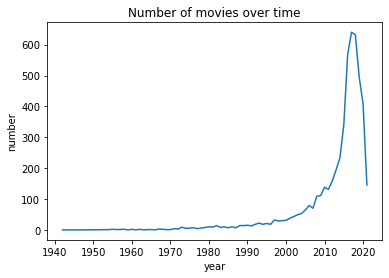

In [16]:
fig=plt.figure()
plt.plot(years_by_avg_duration['release_year'],years_by_avg_duration['count'])
plt.title('Number of movies over time')
plt.xlabel('year')
plt.ylabel('number')
plt.show()

### If we check the number of filmes released by year, we can see that the number of filmes released has increased for the last decade. We can observe that the average duration went down and went back up again. 

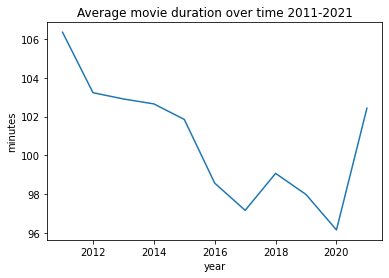

In [17]:
years_by_avg_duration_2=years_by_avg_duration[years_by_avg_duration['release_year']>2010]

fig=plt.figure()
plt.plot(years_by_avg_duration_2['release_year'],years_by_avg_duration_2['mean'])
plt.title('Average movie duration over time 2011-2021')
plt.xlabel('year')
plt.ylabel('minutes')
plt.show()

## Let's look at the types of movies we have in the dataset. One of the interesting categories would be LQBTQ movies. Do we have a significant increase of LGBT movies releases? 
### We can see that the number of LGBTQ movies has increased over years. Let's also see in which regions are those movies available. 

In [18]:
df_movies_LGBTQ=df[df['listed_in'].str.contains('LGBTQ Movies')==True]

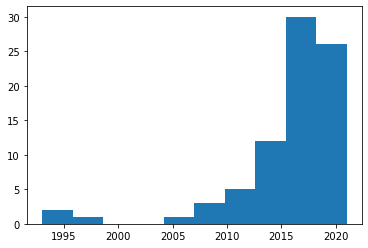

In [19]:
fig=plt.figure()

plt.hist(df_movies_LGBTQ['release_year'])

plt.show()

### We can see that  LGBTQ movies are available in 24 regions.The majority of LGBTQ movies are available for the Netfix subscribers in the United States. 

In [36]:
len(df_movies_LGBTQ['country'].unique())

24

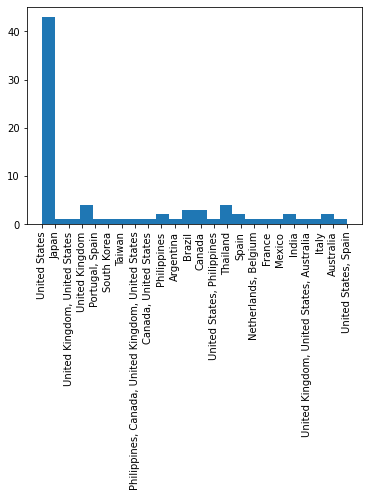

In [38]:
fig=plt.figure()

plt.hist(df_movies_LGBTQ['country'],24)
plt.tick_params(axis='x', labelrotation=90)

plt.show()

## Let's check if any of the directors released more than one movie. 
### We can see that Jun Lana, Saratswadee Wongsomphet and Matt Kugelman directed more than one LGBTQ movie. 

In [45]:
print('Number of directors of LGBTQ movies:',len(df_movies_LGBTQ['director']))
print('Number of unique directors',len(df_movies_LGBTQ['director'].unique()))

Number of directors of LGBTQ movies: 80
Number of unique directors 77


In [51]:
df_movies_LGBTQ['director'].value_counts()

Jun Lana                              2
Saratswadee Wongsomphet               2
Matt Kugelman                         2
Amy Rice                              1
Neil Armfield                         1
                                     ..
Kittiphak Thonguam                    1
Alice Wu                              1
Cristina Costantini, Kareem Tabsch    1
Colin Minihan                         1
Kirati Nakintanon                     1
Name: director, Length: 77, dtype: int64

## We see that most of the LGBTQ movies are available in United States. 
### Let's see the proportion of LGBTQ movies to all movies.

In [77]:
df_US=df[df['country'].str.contains('United States')==True]

In [108]:
df_US['listed_in'].value_counts()

Stand-Up Comedy                                        203
Children & Family Movies, Comedies                     144
Documentaries                                          125
Dramas                                                 113
Action & Adventure                                     111
                                                      ... 
Independent Movies, International Movies, Thrillers      1
Horror Movies, LGBTQ Movies, Music & Musicals            1
Children & Family Movies, Comedies, LGBTQ Movies         1
Comedies, Independent Movies, International Movies       1
Cult Movies, Dramas, Thrillers                           1
Name: listed_in, Length: 212, dtype: int64

In [122]:
print('Total number of movies available for US region:',len(df_US))
print('Number of LGBTQ movies available in the US region:',len(df_US[df_US['listed_in'].str.contains('LGBTQ')==True]))
print('The percent of LGBTQ movies among other movies:',len(df_US[df_US['listed_in'].str.contains('LGBTQ')==True])/len(df_US)*100)

Total number of movies available for US region: 2444
Number of LGBTQ movies available in the US region: 49
The percent of LGBTQ movies among other movies: 2.0049099836333877


## We can see that the top genres in the US region are : Stand-Up Comedy,Children & Family Movies, Comedies,Documentaries,Dramas,Action & Adventure. The most popular genre is Stand Up Comedy. There are 203 movies in this genre. 

### Let's check if any director has directed more than one film. We can see that top 3 directors are Marcus Raboy, Jay Karas and Jay Chapman. All of them directed Stand-Up Comedy. 

In [82]:
top_5_US=df_US[df_US['listed_in'].isin(['Stand-Up Comedy','Children & Family Movies, Comedies','Documentaries','Dramas','Action & Adventure'])]

In [97]:
top_5_US['director'].value_counts()

Marcus Raboy                      14
Jay Karas                         13
Jay Chapman                       11
Shannon Hartman                    8
Robert Rodriguez                   7
                                  ..
Eric Bross                         1
Vince Marcello                     1
Stephen Herek                      1
Raymie Muzquiz, Stu Livingston     1
Peter Hewitt                       1
Name: director, Length: 540, dtype: int64

In [104]:
top_5_US[top_5_US['director']=='Marcus Raboy']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration new
2849,s2850,Movie,Taylor Tomlinson: Quarter-Life Crisis,Marcus Raboy,Taylor Tomlinson,United States,"March 3, 2020",2020,TV-MA,61 min,Stand-Up Comedy,She's halfway through her 20s — and she's over...,61
3776,s3777,Movie,Miranda Sings Live…Your Welcome,Marcus Raboy,Colleen Ballinger,United States,"June 4, 2019",2019,TV-14,62 min,Stand-Up Comedy,Viral video star Miranda Sings and her real-wo...,62
3877,s3878,Movie,Anthony Jeselnik: Fire in the Maternity Ward,Marcus Raboy,Anthony Jeselnik,United States,"April 30, 2019",2019,TV-MA,64 min,Stand-Up Comedy,"Forging his own comedic boundaries, Anthony Je...",64
4314,s4315,Movie,Vir Das: Losing It,Marcus Raboy,Vir Das,United States,"December 11, 2018",2018,TV-MA,68 min,Stand-Up Comedy,"The world's got a lot of problems, but Vir Das...",68
4788,s4789,Movie,Katt Williams: Kattpacalypse,Marcus Raboy,Katt Williams,United States,"July 3, 2018",2012,TV-MA,61 min,Stand-Up Comedy,Urban comic Katt Williams ushers in Kattpacaly...,61
4851,s4852,Movie,Steve Martin and Martin Short: An Evening You ...,Marcus Raboy,"Steve Martin, Martin Short",United States,"May 25, 2018",2018,TV-14,74 min,Stand-Up Comedy,Longtime pals and showbiz icons Steve Martin a...,74
5024,s5025,Movie,Marlon Wayans: Woke-ish,Marcus Raboy,Marlon Wayans,United States,"February 27, 2018",2018,TV-MA,67 min,Stand-Up Comedy,"Rollicking, outrageous and audacious, Marlon W...",67
5127,s5128,Movie,Judd Apatow: The Return,Marcus Raboy,Judd Apatow,United States,"December 12, 2017",2017,TV-MA,70 min,Stand-Up Comedy,Judd Apatow returns to stand-up comedy after 2...,70
5171,s5172,Movie,DeRay Davis: How to Act Black,Marcus Raboy,DeRay Davis,United States,"November 14, 2017",2017,TV-MA,66 min,Stand-Up Comedy,Dynamic comic DeRay Davis hits the stage like ...,66
5315,s5316,Movie,Ryan Hamilton: Happy Face,Marcus Raboy,Ryan Hamilton,United States,"August 29, 2017",2017,TV-14,57 min,Stand-Up Comedy,Small-town import Ryan Hamilton charms New Yor...,57


In [99]:
top_5_US[top_5_US['director']=='Jay Karas']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration new
3733,s3734,Movie,Adam Devine: Best Time of Our Lives,Jay Karas,Adam Devine,United States,"June 18, 2019",2019,TV-MA,59 min,Stand-Up Comedy,Frenetic comic Adam Devine talks teen awkwardn...,59
4803,s4804,Movie,Bill Burr: You People Are All the Same,Jay Karas,Bill Burr,United States,"June 30, 2018",2012,TV-MA,69 min,Stand-Up Comedy,Funnyman Bill Burr takes the stage to uncork a...,69
4863,s4864,Movie,Ali Wong: Hard Knock Wife,Jay Karas,Ali Wong,United States,"May 13, 2018",2018,TV-MA,64 min,Stand-Up Comedy,"Two years after the hit ""Baby Cobra,"" Ali Wong...",64
5086,s5087,Movie,Tom Segura: Disgraceful,Jay Karas,Tom Segura,United States,"January 12, 2018",2018,TV-MA,71 min,Stand-Up Comedy,Tom Segura gives voice to the sordid thoughts ...,71
5230,s5231,Movie,Christina P: Mother Inferior,Jay Karas,Christina Pazsitzky,United States,"October 10, 2017",2017,TV-MA,59 min,Stand-Up Comedy,Christina Pazsitzky hits Seattle with a biting...,59
5622,s5623,Movie,Bill Burr: Walk Your Way Out,Jay Karas,Bill Burr,United States,"January 31, 2017",2017,TV-MA,78 min,Stand-Up Comedy,No-nonsense comic Bill Burr takes the stage in...,78
5808,s5809,Movie,Jeff Foxworthy and Larry the Cable Guy: We’ve ...,Jay Karas,"Jeff Foxworthy, Larry the Cable Guy",United States,"August 26, 2016",2016,TV-14,75 min,Stand-Up Comedy,Grammy-nominated comedians Jeff Foxworthy and ...,75
5817,s5818,Movie,Jim Gaffigan: Mr. Universe,Jay Karas,Jim Gaffigan,United States,"August 11, 2016",2012,TV-14,77 min,Stand-Up Comedy,Funnyman Jim Gaffigan offers up his unique tak...,77
5847,s5848,Movie,Ali Wong: Baby Cobra,Jay Karas,Ali Wong,United States,"May 6, 2016",2016,TV-MA,60 min,Stand-Up Comedy,Ali Wong's stand up special delves into her se...,60
5875,s5876,Movie,Tom Segura: Mostly Stories,Jay Karas,Tom Segura,United States,"January 8, 2016",2016,TV-MA,74 min,Stand-Up Comedy,"The bearded, bawdy and comically bitter Tom Se...",74


In [100]:
top_5_US[top_5_US['director']=='Jay Chapman']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration new
3645,s3646,Movie,D.L. Hughley: Contrarian,Jay Chapman,D.L. Hughley,United States,"July 21, 2019",2018,TV-MA,58 min,Stand-Up Comedy,D.L. Hughley riffs on hot-button political iss...,58
4222,s4223,Movie,Moshe Kasher: Live in Oakland,Jay Chapman,Moshe Kasher,United States,"January 1, 2019",2012,TV-MA,61 min,Stand-Up Comedy,Comic Moshe Kasher returns to his home turf of...,61
4248,s4249,Movie,Todd Glass: Stand-Up Special,Jay Chapman,Todd Glass,United States,"December 31, 2018",2012,TV-MA,46 min,Stand-Up Comedy,Standup comedian Todd Glass gets right down to...,46
5108,s5109,Movie,Todd Barry: Spicy Honey,Jay Chapman,Todd Barry,United States,"December 26, 2017",2017,TV-MA,61 min,Stand-Up Comedy,"With bone-dry wit, stand-up comic Todd Barry d...",61
5134,s5135,Movie,Craig Ferguson: Tickle Fight,Jay Chapman,Craig Ferguson,United States,"December 5, 2017",2017,TV-MA,67 min,Stand-Up Comedy,Cheeky comic Craig Ferguson keeps it casual as...,67
5326,s5327,Movie,Colin Quinn: Unconstitutional,Jay Chapman,Colin Quinn,United States,"August 15, 2017",2015,TV-MA,56 min,Stand-Up Comedy,New York comedian Colin Quinn writes and stars...,56
5378,s5379,Movie,D.L. Hughley: Clear,Jay Chapman,D.L. Hughley,United States,"July 13, 2017",2014,TV-MA,59 min,Stand-Up Comedy,In this 2014 standup special filmed in San Fra...,59
5379,s5380,Movie,Tom Segura: Completely Normal,Jay Chapman,Tom Segura,United States,"July 13, 2017",2014,TV-MA,74 min,Stand-Up Comedy,Levelheaded stand-up Tom Segura shares offhand...,74
5525,s5526,Movie,Lucas Brothers: On Drugs,Jay Chapman,"Keith Lucas, Kenny Lucas",United States,"April 18, 2017",2017,TV-MA,50 min,Stand-Up Comedy,Deadpan twin comics Keith and Kenny Lucas take...,50
5818,s5819,Movie,Jim Gaffigan: Obsessed,Jay Chapman,Jim Gaffigan,United States,"August 11, 2016",2014,TV-14,70 min,Stand-Up Comedy,Comic Jim Gaffigan delivers his sardonic take ...,70
